This notebook explores the possibility to use the Python package [xray](http://xray.readthedocs.org/en/stable/) in order to ease the data processing from the TS/WEST database.

xray is an open source project and Python package that aims to bring the labeled data power of [pandas](http://pandas.pydata.org/) to the physical sciences, by providing N-dimensional variants of the core pandas data structures.

In [1]:
%pylab inline
import xray

Populating the interactive namespace from numpy and matplotlib


Below I'm using MDSplus to retrieve Tore Supra data, only because `pywed.tsbase()` didn't work from VPN. The idea is however the same with pywed.

#1D data : f(t) 

In [2]:
from pywed import *
y,t = tsbase(34567, 'SIPMES')

Connection error reported: [WinError 10060] Une tentative de connexion a échoué car le parti connecté n’a pas répondu convenablement au-delà d’une certaine durée ou une connexion établie a échoué car l’hôte de connexion n’a pas répondu
Connection error reported: [WinError 10060] Une tentative de connexion a échoué car le parti connecté n’a pas répondu convenablement au-delà d’une certaine durée ou une connexion établie a échoué car l’hôte de connexion n’a pas répondu
Connection error reported: [WinError 10060] Une tentative de connexion a échoué car le parti connecté n’a pas répondu convenablement au-delà d’une certaine durée ou une connexion établie a échoué car l’hôte de connexion n’a pas répondu
Connection error reported: [WinError 10060] Une tentative de connexion a échoué car le parti connecté n’a pas répondu convenablement au-delà d’une certaine durée ou une connexion établie a échoué car l’hôte de connexion n’a pas répondu


PyWEDException: [Exception tsExClientError in PyWED] [Client Error] 'Unable to connect to 10.8.86.1 at port 5880'

In [5]:
import MDSplus as mds
conx = mds.Connection('mdsplus.partenaires.cea.fr:8000')

In [6]:
y = conx.get('_sig=gettsbase(34567,"SIPMES")')
t = conx.get('dim_of(_sig)')

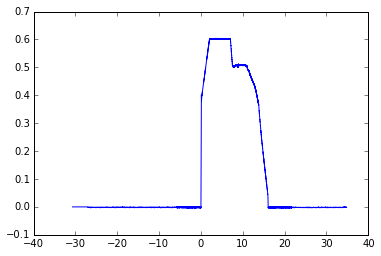

In [7]:
plot(t,y)

*xray* main data structure is `DataArray`. It is a labeled, N-dimensional array and a N-D generalization of a `pandas.Series`. Soem additional attributes, like the data units, can be set for information. 

In [8]:
Ip=xray.DataArray(data=y, coords=[('time', t)])
Ip.attrs['units'] = 'MA'

print(Ip)

<xray.DataArray (time: 14600)>
array([ 0.        ,  0.        ,  0.        , ..., -0.00170898,
        0.        , -0.00195312])
Coordinates:
  * time     (time) float64 -30.7 -30.66 -30.63 -30.6 -30.56 -30.53 -30.5 ...
Attributes:
    units: MA


##xray DataArray properties

The values can be accessed with the `values` attribute:

In [9]:
Ip.values

array([ 0.        ,  0.        ,  0.        , ..., -0.00170898,
        0.        , -0.00195312])

The name of the dimension:

In [10]:
Ip.dims

('time',)

The coordinates (here the time values):

In [11]:
Ip.coords

Coordinates:
  * time     (time) float64 -30.7 -30.66 -30.63 -30.6 -30.56 -30.53 -30.5 ...

Or its attributes (metadata)

In [12]:
Ip.attrs

OrderedDict([('units', 'MA')])

The coordinates values can be accessed through:

In [13]:
# Getting the coordinates values
Ip['time']

<xray.DataArray 'time' (time: 14600)>
array([-30.695195, -30.662427, -30.629659, ...,  34.736357,  34.769125,
        34.801893])
Coordinates:
  * time     (time) float64 -30.7 -30.66 -30.63 -30.6 -30.56 -30.53 -30.5 ...

In [14]:
# Or, equivalently:
Ip.coords['time']

<xray.DataArray 'time' (time: 14600)>
array([-30.695195, -30.662427, -30.629659, ...,  34.736357,  34.769125,
        34.801893])
Coordinates:
  * time     (time) float64 -30.7 -30.66 -30.63 -30.6 -30.56 -30.53 -30.5 ...

##Plotting capabilities

`DataArray` has a `.plot()` method similar to pandas's. (The plotting capabilities of xray are currently under active development...)

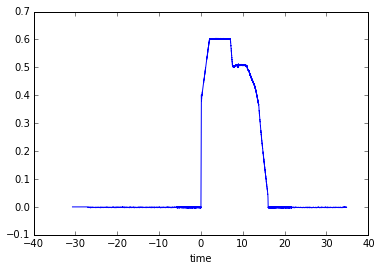

In [15]:
Ip.plot()

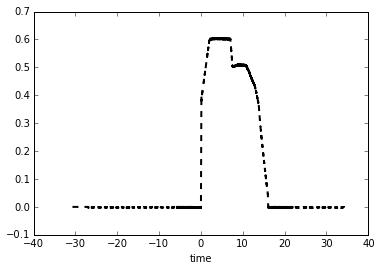

In [16]:
Ip.plot(lw=2, linestyle='--', color='k')

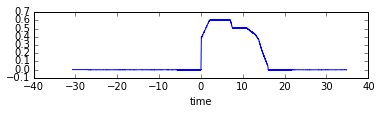

In [17]:
#the plot can be accessed to an existing axes 
ax1 = subplot(311)
Ip.plot(ax=ax1)

##Indexing

In [18]:
#Getting the 50th first element. Returns a DataArray
#Note that the attributes are persisted
Ip[:50]

<xray.DataArray (time: 50)>
array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])
Coordinates:
  * time     (time) float64 -30.7 -30.66 -30.63 -30.6 -30.56 -30.53 -30.5 ...
Attributes:
    units: MA

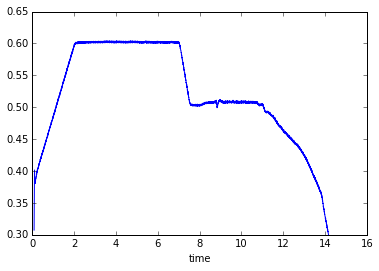

In [19]:
# Selecting data from their values and plot it
Ip.where(Ip > 0.3).plot()

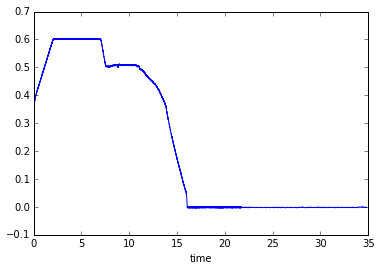

In [20]:
# Selecting data from its coordinates.
# Ex: positive-time values 
Ip.where(Ip.time > 0).plot()

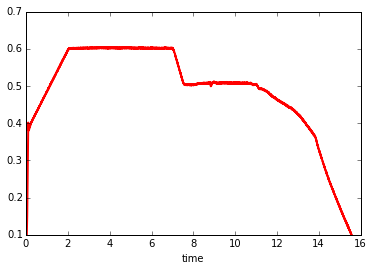

In [21]:
# Selecting an 'interesting zone' with multiples conditions.
# Pay attention to the parenthesis around each conditions
interesting_zone = (Ip.time > -1) & (Ip.time < 20) & (Ip > 0.1)
Ip.where(interesting_zone).plot(lw=2, color='r')

#2D data: f(t,r)

In [22]:
conx = mds.Connection('mdsplus.partenaires.cea.fr:8000')
gnl_values = conx.get('_sig=gettsbase(34567,"GNL")')
gnl_t = conx.get('dim_of(_sig,0)')
gnl_R = conx.get('dim_of(_sig,1)') # returns [0,1,2,3,4] ...
gnl_R = [1.97, 2.135, 2.3, 2.465, 2.63]

Creates an 2D `DataArray` object:

In [23]:
xray.DataArray(gnl_values)

<xray.DataArray (dim_0: 5, dim_1: 25408)>
[127040 values with dtype=float64]
Coordinates:
  * dim_0    (dim_0) int64 0 1 2 3 4
  * dim_1    (dim_1) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

Same thing, but set the dimensions and coordinates. (time array shape is returned (1,N) from MDSplus, 
 while xray requires (N,) --> squeeze) 

In [32]:
gnl = xray.DataArray(gnl_values, coords=[('R', gnl_R), ('time', gnl_t.squeeze())])

In [33]:
print(gnl)

<xray.DataArray (R: 5, time: 25408)>
[127040 values with dtype=float64]
Coordinates:
  * R        (R) float64 1.97 2.135 2.3 2.465 2.63
  * time     (time) float64 -5.794 -5.792 -5.789 -5.787 -5.785 -5.783 -5.781 ...


##Indexing

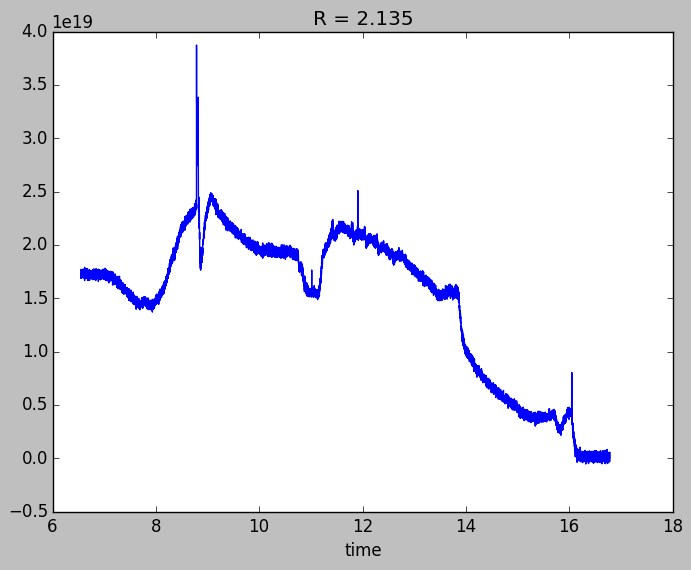

In [47]:
# Index by integer array indices
# Get Nl for R=2.135m (indice==1) and between the 10 000th and 20 000th time points
#
# gnl[dict(R=1, time=slice(10000,20000))].plot()
# or more simply:
gnl.isel(R=1, time=slice(10000,20000)).plot()

In [ ]:
# Index by dimension coordinates labels
# getting the data for R=2.465 m and between t=[-0.2, 18] s
#
#gnl.loc[dict(R=2.465, time=slice(-0.2, 18))].plot()
# or more simply

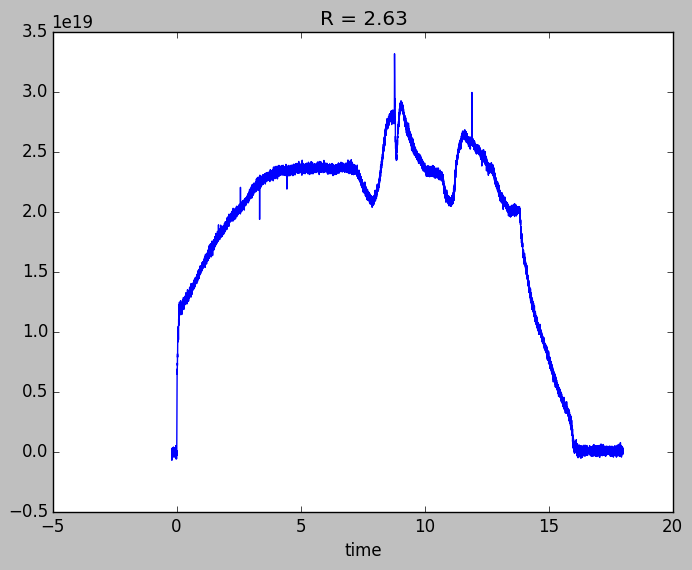

In [45]:
gnl.sel(R=2.63, time=slice(-0.2, 18)).plot()

##Plotting
The default method `xray.DataArray.plot()` sees that the data is 2 dimensional. If the coordinates are uniformly spaced then it calls `xray.plot.imshow()`. But It’s not necessary for the coordinates to be evenly spaced. If not, then `xray.DataArray.plot()`  produces a filled contour plot by calling `xray.plot.contourf()`.

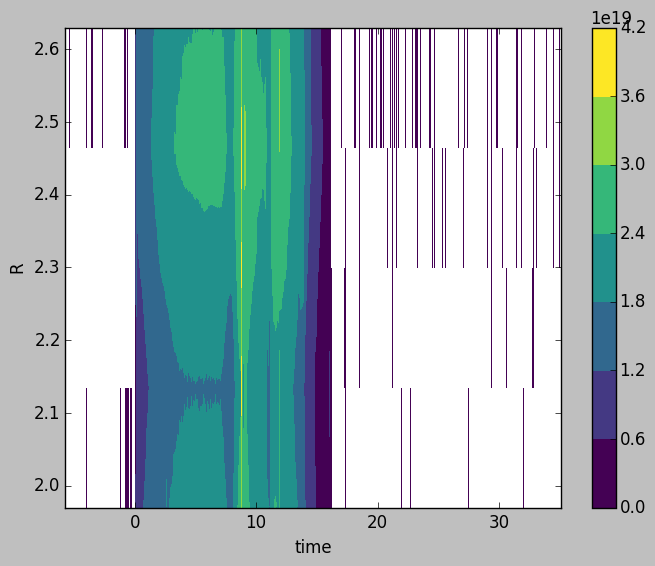

In [41]:
gnl.where(gnl>1e10).plot()